In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration: File paths
SP500_FILE_PATH = 'HistoricalData_1750587928127.csv'
VIX_FILE_PATH = 'VIX_History.csv'

print("=== TRADING STRATEGY DATA LOADING AND ANALYSIS ===")
print(f"Loading data from {SP500_FILE_PATH} and {VIX_FILE_PATH}")
print("-" * 50)

=== TRADING STRATEGY DATA LOADING AND ANALYSIS ===
Loading data from HistoricalData_1750587928127.csv and VIX_History.csv
--------------------------------------------------


In [2]:
# Load S&P 500 data
try:
    print("📈 Loading S&P 500 Historical Data...")
    # Load with proper date parsing
    sp500_df = pd.read_csv(SP500_FILE_PATH)
    
    # Inspect the raw data structure
    print(f"S&P 500 Raw Data Shape: {sp500_df.shape}")
    print(f"Columns: {list(sp500_df.columns)}")
    print("\nFirst 5 rows:")
    print(sp500_df.head())
    
    # Convert date and set as index
    sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
    sp500_df = sp500_df.set_index('Date')
    
    # Rename columns to standard format and select relevant ones
    sp500_df = sp500_df.rename(columns={
        'Close/Last': 'Close',
        'Open': 'Open', 
        'High': 'High',
        'Low': 'Low'
    })
    
    # Select and rename for merging
    sp500_df = sp500_df[['Close', 'Open', 'High', 'Low']].rename(columns={
        'Close': 'SP500_Close',
        'Open': 'SP500_Open',
        'High': 'SP500_High', 
        'Low': 'SP500_Low'
    })
    
    # Sort by date ascending (oldest first)
    sp500_df = sp500_df.sort_index()
    
    print(f"\n✅ S&P 500 data loaded successfully!")
    print(f"Date range: {sp500_df.index.min()} to {sp500_df.index.max()}")
    print(f"Total records: {len(sp500_df)}")
    print("\nProcessed S&P 500 data structure:")
    print(sp500_df.head())
    
except FileNotFoundError:
    print(f"❌ Error: S&P 500 data file not found at {SP500_FILE_PATH}")
    raise
except Exception as e:
    print(f"❌ Error loading S&P 500 data: {e}")
    raise

📈 Loading S&P 500 Historical Data...
S&P 500 Raw Data Shape: (2519, 5)
Columns: ['Date', 'Close/Last', 'Open', 'High', 'Low']

First 5 rows:
         Date  Close/Last     Open     High      Low
0  06/20/2025     5967.84  5999.67  6018.20  5952.56
1  06/18/2025     5980.87  5987.93  6018.25  5971.89
2  06/17/2025     5982.72  6012.15  6023.25  5974.80
3  06/16/2025     6033.11  6004.00  6050.83  6004.00
4  06/13/2025     5976.97  6000.56  6026.16  5963.21

✅ S&P 500 data loaded successfully!
Date range: 2015-06-22 00:00:00 to 2025-06-20 00:00:00
Total records: 2519

Processed S&P 500 data structure:
            SP500_Close  SP500_Open  SP500_High  SP500_Low
Date                                                      
2015-06-22      2122.85     2112.50     2129.87    2112.50
2015-06-23      2124.20     2123.16     2128.03    2119.89
2015-06-24      2108.58     2123.65     2125.10    2108.58
2015-06-25      2102.31     2109.96     2116.04    2101.78
2015-06-26      2101.49     2102.62     

In [3]:
# Load VIX data
try:
    print("\n📊 Loading VIX Historical Data...")
    # Load with proper date parsing
    vix_df = pd.read_csv(VIX_FILE_PATH)
    
    # Inspect the raw data structure
    print(f"VIX Raw Data Shape: {vix_df.shape}")
    print(f"Columns: {list(vix_df.columns)}")
    print("\nFirst 5 rows:")
    print(vix_df.head())
    
    # Convert date and set as index
    vix_df['DATE'] = pd.to_datetime(vix_df['DATE'])
    vix_df = vix_df.set_index('DATE')
    
    # Rename columns to standard format and select relevant ones
    vix_df = vix_df.rename(columns={
        'CLOSE': 'Close',
        'OPEN': 'Open',
        'HIGH': 'High', 
        'LOW': 'Low'
    })
    
    # Select and rename for merging
    vix_df = vix_df[['Close', 'Open', 'High', 'Low']].rename(columns={
        'Close': 'VIX_Close',
        'Open': 'VIX_Open',
        'High': 'VIX_High',
        'Low': 'VIX_Low'
    })
    
    # Sort by date ascending (oldest first)
    vix_df = vix_df.sort_index()
    
    print(f"\n✅ VIX data loaded successfully!")
    print(f"Date range: {vix_df.index.min()} to {vix_df.index.max()}")
    print(f"Total records: {len(vix_df)}")
    print("\nProcessed VIX data structure:")
    print(vix_df.head())
    
except FileNotFoundError:
    print(f"❌ Error: VIX data file not found at {VIX_FILE_PATH}")
    raise
except Exception as e:
    print(f"❌ Error loading VIX data: {e}")
    raise


📊 Loading VIX Historical Data...
VIX Raw Data Shape: (8954, 5)
Columns: ['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE']

First 5 rows:
         DATE   OPEN   HIGH    LOW  CLOSE
0  01/02/1990  17.24  17.24  17.24  17.24
1  01/03/1990  18.19  18.19  18.19  18.19
2  01/04/1990  19.22  19.22  19.22  19.22
3  01/05/1990  20.11  20.11  20.11  20.11
4  01/08/1990  20.26  20.26  20.26  20.26

✅ VIX data loaded successfully!
Date range: 1990-01-02 00:00:00 to 2025-06-20 00:00:00
Total records: 8954

Processed VIX data structure:
            VIX_Close  VIX_Open  VIX_High  VIX_Low
DATE                                              
1990-01-02      17.24     17.24     17.24    17.24
1990-01-03      18.19     18.19     18.19    18.19
1990-01-04      19.22     19.22     19.22    19.22
1990-01-05      20.11     20.11     20.11    20.11
1990-01-08      20.26     20.26     20.26    20.26


In [4]:
# Data Quality Analysis
print("\n" + "="*60)
print("📋 DATA QUALITY ANALYSIS")
print("="*60)

# Check for missing values
print("\n🔍 Missing Values Analysis:")
print(f"S&P 500 missing values: {sp500_df.isnull().sum().sum()}")
print(f"VIX missing values: {vix_df.isnull().sum().sum()}")

# Check for duplicates
print(f"\n📊 Duplicate Records:")
print(f"S&P 500 duplicate dates: {sp500_df.index.duplicated().sum()}")
print(f"VIX duplicate dates: {vix_df.index.duplicated().sum()}")

# Data range overlap analysis
print(f"\n📅 Date Range Analysis:")
print(f"S&P 500: {sp500_df.index.min().strftime('%Y-%m-%d')} to {sp500_df.index.max().strftime('%Y-%m-%d')}")
print(f"VIX: {vix_df.index.min().strftime('%Y-%m-%d')} to {vix_df.index.max().strftime('%Y-%m-%d')}")

# Find overlapping date range
overlap_start = max(sp500_df.index.min(), vix_df.index.min())
overlap_end = min(sp500_df.index.max(), vix_df.index.max())
print(f"Overlapping period: {overlap_start.strftime('%Y-%m-%d')} to {overlap_end.strftime('%Y-%m-%d')}")

# Calculate potential merged records
sp500_overlap = sp500_df.loc[overlap_start:overlap_end]
vix_overlap = vix_df.loc[overlap_start:overlap_end]
print(f"S&P 500 records in overlap: {len(sp500_overlap)}")
print(f"VIX records in overlap: {len(vix_overlap)}")

# Statistical summary
print(f"\n📈 Basic Statistics:")
print("\nS&P 500 Close Price Statistics:")
print(sp500_df['SP500_Close'].describe())
print("\nVIX Close Statistics:")
print(vix_df['VIX_Close'].describe())


📋 DATA QUALITY ANALYSIS

🔍 Missing Values Analysis:
S&P 500 missing values: 0
VIX missing values: 0

📊 Duplicate Records:
S&P 500 duplicate dates: 0
VIX duplicate dates: 0

📅 Date Range Analysis:
S&P 500: 2015-06-22 to 2025-06-20
VIX: 1990-01-02 to 2025-06-20
Overlapping period: 2015-06-22 to 2025-06-20
S&P 500 records in overlap: 2519
VIX records in overlap: 2539

📈 Basic Statistics:

S&P 500 Close Price Statistics:
count    2519.000000
mean     3525.562572
std      1161.654393
min      1829.080000
25%      2578.860000
50%      3248.920000
75%      4372.895000
max      6144.150000
Name: SP500_Close, dtype: float64

VIX Close Statistics:
count    8954.000000
mean       19.488012
std         7.827637
min         9.140000
25%        13.880000
50%        17.660000
75%        22.810000
max        82.690000
Name: VIX_Close, dtype: float64


In [5]:
# Merge the datasets
print("\n" + "="*60)
print("🔗 MERGING DATASETS")
print("="*60)

# Merge on index (Date) using inner join to keep only matching dates
print("Performing inner join on dates...")
combined_df = pd.merge(
    sp500_df, 
    vix_df, 
    left_index=True, 
    right_index=True, 
    how='inner'
)

# Ensure chronological order
combined_df = combined_df.sort_index()

print(f"\n✅ Datasets merged successfully!")
print(f"Combined dataset shape: {combined_df.shape}")
print(f"Date range: {combined_df.index.min().strftime('%Y-%m-%d')} to {combined_df.index.max().strftime('%Y-%m-%d')}")

print(f"\n📊 Final Combined Dataset Info:")
combined_df.info()

print(f"\n📋 First 10 rows of combined dataset:")
print(combined_df.head(10))

print(f"\n📋 Last 10 rows of combined dataset:")
print(combined_df.tail(10))

print(f"\n🎯 Column Summary:")
for col in combined_df.columns:
    print(f"  • {col}: {combined_df[col].dtype}")

# Check for any remaining missing values after merge
missing_after_merge = combined_df.isnull().sum().sum()
print(f"\n🔍 Missing values after merge: {missing_after_merge}")

if missing_after_merge > 0:
    print("Missing value details:")
    print(combined_df.isnull().sum())

print(f"\n💾 Combined dataset stored in variable 'combined_df'")
print("Ready for next preprocessing steps!")


🔗 MERGING DATASETS
Performing inner join on dates...

✅ Datasets merged successfully!
Combined dataset shape: (2515, 8)
Date range: 2015-06-22 to 2025-06-20

📊 Final Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-06-22 to 2025-06-20
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SP500_Close  2515 non-null   float64
 1   SP500_Open   2515 non-null   float64
 2   SP500_High   2515 non-null   float64
 3   SP500_Low    2515 non-null   float64
 4   VIX_Close    2515 non-null   float64
 5   VIX_Open     2515 non-null   float64
 6   VIX_High     2515 non-null   float64
 7   VIX_Low      2515 non-null   float64
dtypes: float64(8)
memory usage: 176.8 KB

📋 First 10 rows of combined dataset:
            SP500_Close  SP500_Open  SP500_High  SP500_Low  VIX_Close  \
2015-06-22      2122.85     2112.50     2129.87    2112.50      12.74   
2015-06-23      2124.20     2123.16     


📈 QUICK DATA VISUALIZATION


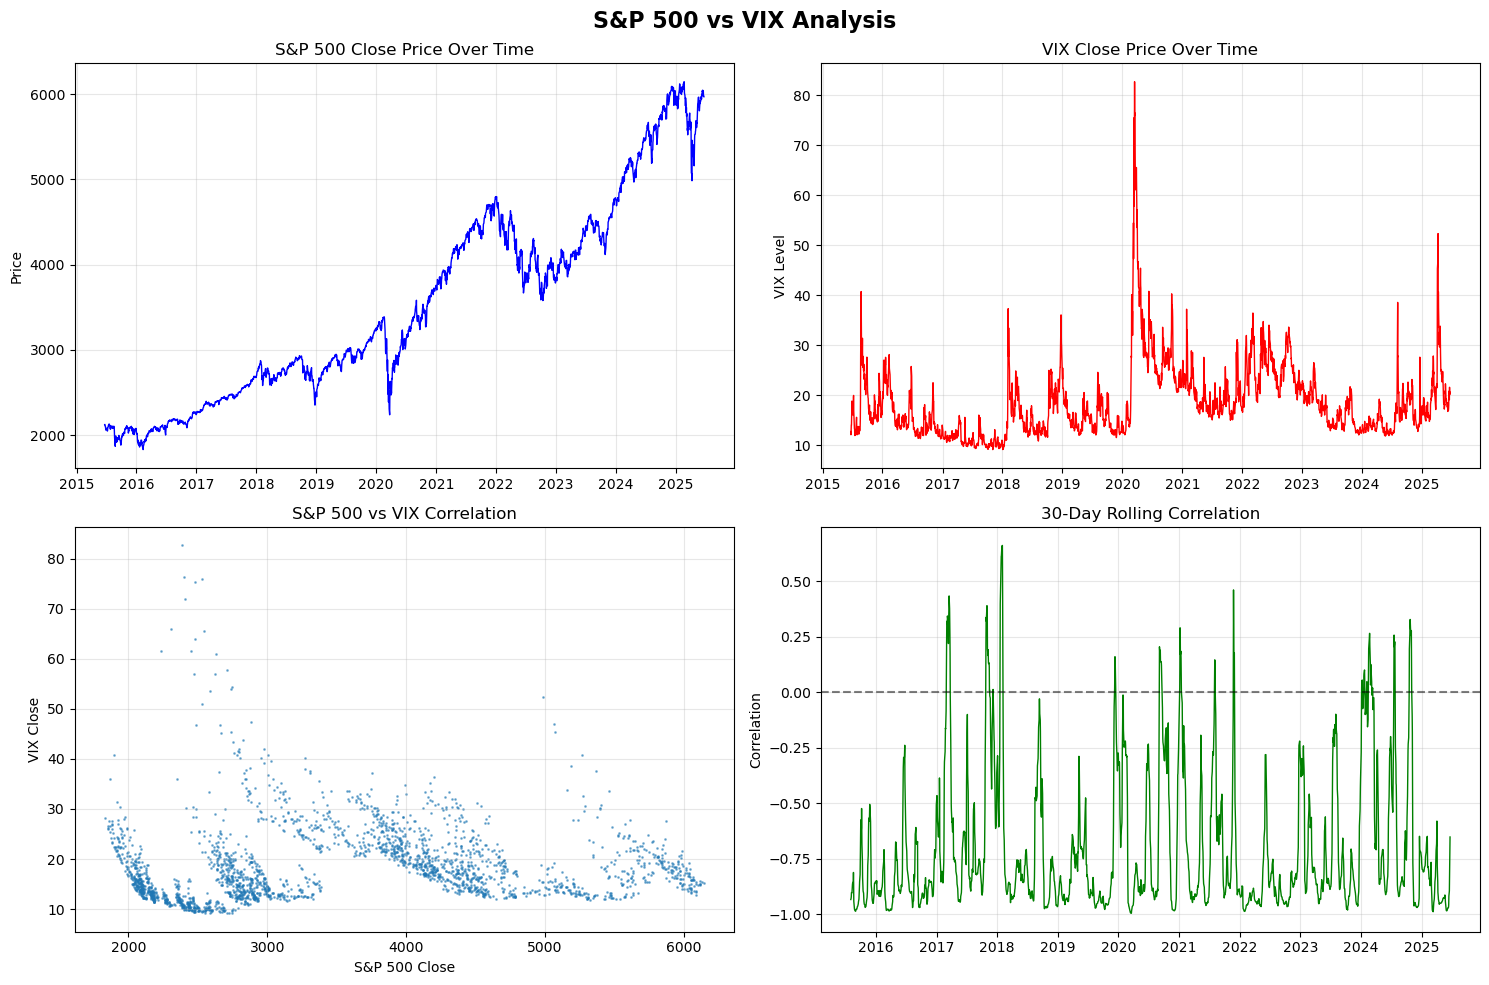


📊 Overall S&P 500 vs VIX Correlation: 0.0821

🎯 Key Insights:
  • Dataset contains 2515 trading days
  • S&P 500 price range: $1829.08 - $6144.15
  • VIX range: 9.14 - 82.69
  • Average VIX level: 18.56
  • VIX standard deviation: 7.40
  • High volatility periods (VIX > 30): 156 days (6.2%)


In [6]:
# Quick visualization of the merged data
print("\n" + "="*60)
print("📈 QUICK DATA VISUALIZATION")
print("="*60)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('S&P 500 vs VIX Analysis', fontsize=16, fontweight='bold')

# Plot 1: S&P 500 Close Price over time
axes[0, 0].plot(combined_df.index, combined_df['SP500_Close'], color='blue', linewidth=1)
axes[0, 0].set_title('S&P 500 Close Price Over Time')
axes[0, 0].set_ylabel('Price')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: VIX Close Price over time  
axes[0, 1].plot(combined_df.index, combined_df['VIX_Close'], color='red', linewidth=1)
axes[0, 1].set_title('VIX Close Price Over Time')
axes[0, 1].set_ylabel('VIX Level')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Correlation scatter plot
axes[1, 0].scatter(combined_df['SP500_Close'], combined_df['VIX_Close'], alpha=0.5, s=1)
axes[1, 0].set_title('S&P 500 vs VIX Correlation')
axes[1, 0].set_xlabel('S&P 500 Close')
axes[1, 0].set_ylabel('VIX Close')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Rolling correlation
window = 30  # 30-day rolling correlation
rolling_corr = combined_df['SP500_Close'].rolling(window=window).corr(combined_df['VIX_Close'])
axes[1, 1].plot(combined_df.index, rolling_corr, color='green', linewidth=1)
axes[1, 1].set_title(f'{window}-Day Rolling Correlation')
axes[1, 1].set_ylabel('Correlation')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Calculate and display correlation
correlation = combined_df['SP500_Close'].corr(combined_df['VIX_Close'])
print(f"\n📊 Overall S&P 500 vs VIX Correlation: {correlation:.4f}")

# Additional insights
print(f"\n🎯 Key Insights:")
print(f"  • Dataset contains {len(combined_df)} trading days")
print(f"  • S&P 500 price range: ${combined_df['SP500_Close'].min():.2f} - ${combined_df['SP500_Close'].max():.2f}")
print(f"  • VIX range: {combined_df['VIX_Close'].min():.2f} - {combined_df['VIX_Close'].max():.2f}")
print(f"  • Average VIX level: {combined_df['VIX_Close'].mean():.2f}")
print(f"  • VIX standard deviation: {combined_df['VIX_Close'].std():.2f}")

# High VIX periods (VIX > 30 typically indicates high fear)
high_vix_periods = combined_df[combined_df['VIX_Close'] > 30]
print(f"  • High volatility periods (VIX > 30): {len(high_vix_periods)} days ({len(high_vix_periods)/len(combined_df)*100:.1f}%)")

In [7]:
# Install required packages if not already installed
import sys
import subprocess

try:
    import ta
    print("✅ ta library already installed")
except ImportError:
    print("📦 Installing ta library...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ta"])
    import ta
    print("✅ ta library installed successfully")

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Make a copy to avoid modifying the original combined_df
data_df = combined_df.copy()

print("=" * 60)
print("📋 CONTINUING DATA PREPROCESSING...")
print("=" * 60)

✅ ta library already installed
📋 CONTINUING DATA PREPROCESSING...


In [8]:
# --- Step 2.2: Outlier Detection and Treatment ---
print("\n--- Step 2.2: Outlier Detection and Treatment ---")
print("🔍 Analyzing potential outliers in financial data...")

# For financial data, extreme values are often valid market movements
# Let's identify and analyze potential outliers before deciding on treatment

def detect_outliers_iqr(data, column_name, multiplier=1.5):
    """Detect outliers using IQR method"""
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers for key variables
print("\n📊 Outlier Analysis:")

for column in ['SP500_Close', 'VIX_Close']:
    outliers, lower, upper = detect_outliers_iqr(data_df, column)
    print(f"\n{column}:")
    print(f"  • IQR bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"  • Outliers detected: {len(outliers)} ({len(outliers)/len(data_df)*100:.1f}%)")
    
    if len(outliers) > 0:
        print(f"  • Outlier range: {outliers[column].min():.2f} to {outliers[column].max():.2f}")
        # Show dates of extreme outliers
        extreme_outliers = outliers.nlargest(3, column) if column == 'VIX_Close' else outliers.nsmallest(3, column)
        print(f"  • Notable outlier dates: {list(extreme_outliers.index.strftime('%Y-%m-%d'))}")

# Special analysis for VIX (volatility spikes are normal during market stress)
print(f"\n🎯 VIX Analysis:")
vix_high = data_df[data_df['VIX_Close'] > 30]  # High fear periods
vix_extreme = data_df[data_df['VIX_Close'] > 50]  # Extreme fear periods
print(f"  • VIX > 30 (high volatility): {len(vix_high)} days ({len(vix_high)/len(data_df)*100:.1f}%)")
print(f"  • VIX > 50 (extreme volatility): {len(vix_extreme)} days ({len(vix_extreme)/len(data_df)*100:.1f}%)")

if len(vix_extreme) > 0:
    print(f"  • Extreme VIX dates: {list(vix_extreme.index.strftime('%Y-%m-%d')[:5])}")

# Decision: For financial data, we'll keep outliers as they represent real market events
print(f"\n✅ Decision: Keeping all data points as outliers represent valid market movements")
print(f"💡 Extreme VIX values often correspond to market crises and are valuable for prediction")


--- Step 2.2: Outlier Detection and Treatment ---
🔍 Analyzing potential outliers in financial data...

📊 Outlier Analysis:

SP500_Close:
  • IQR bounds: [-109.06, 7062.90]
  • Outliers detected: 0 (0.0%)

VIX_Close:
  • IQR bounds: [1.11, 34.01]
  • Outliers detected: 69 (2.7%)
  • Outlier range: 34.02 to 82.69
  • Notable outlier dates: ['2020-03-16', '2020-03-18', '2020-03-17']

🎯 VIX Analysis:
  • VIX > 30 (high volatility): 156 days (6.2%)
  • VIX > 50 (extreme volatility): 19 days (0.8%)
  • Extreme VIX dates: ['2020-03-09', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16']

✅ Decision: Keeping all data points as outliers represent valid market movements
💡 Extreme VIX values often correspond to market crises and are valuable for prediction


In [9]:
# --- Step 2.3: Data Normalization/Standardization ---
print("\n--- Step 2.3: Data Normalization/Standardization ---")
print("🔧 Applying Standardization (Z-score normalization) to numerical features...")

# Identify numerical columns to scale
# Include all OHLC data for both S&P 500 and VIX
features_to_scale = [
    'SP500_Close', 'SP500_Open', 'SP500_High', 'SP500_Low',
    'VIX_Close', 'VIX_Open', 'VIX_High', 'VIX_Low'
]

print(f"\n📊 Features to be standardized: {features_to_scale}")

# Show original data statistics
print("\n📈 Original Data Statistics (before scaling):")
for feature in features_to_scale:
    mean_val = data_df[feature].mean()
    std_val = data_df[feature].std()
    print(f"  • {feature}: μ={mean_val:.2f}, σ={std_val:.2f}")

# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy for scaled data
data_df_scaled = data_df.copy()

# Apply standardization
print(f"\n⚙️ Applying StandardScaler transformation...")
data_df_scaled[features_to_scale] = scaler.fit_transform(data_df_scaled[features_to_scale])

# Verify standardization
print(f"\n📊 After Standardization Statistics:")
for feature in features_to_scale:
    mean_val = data_df_scaled[feature].mean()
    std_val = data_df_scaled[feature].std()
    print(f"  • {feature}: μ={mean_val:.6f}, σ={std_val:.6f}")

print(f"\n✅ Features standardized successfully!")
print(f"\n📋 First 5 rows of standardized features:")
print(data_df_scaled[features_to_scale].head())

# Store scaler for later use in prediction
print(f"\n💾 StandardScaler fitted and stored for future use in predictions")


--- Step 2.3: Data Normalization/Standardization ---
🔧 Applying Standardization (Z-score normalization) to numerical features...

📊 Features to be standardized: ['SP500_Close', 'SP500_Open', 'SP500_High', 'SP500_Low', 'VIX_Close', 'VIX_Open', 'VIX_High', 'VIX_Low']

📈 Original Data Statistics (before scaling):
  • SP500_Close: μ=3527.93, σ=1161.06
  • SP500_Open: μ=3527.33, σ=1160.69
  • SP500_High: μ=3546.63, σ=1167.20
  • SP500_Low: μ=3506.60, σ=1154.00
  • VIX_Close: μ=18.56, σ=7.40
  • VIX_Open: μ=18.71, σ=7.45
  • VIX_High: μ=19.85, σ=8.31
  • VIX_Low: μ=17.67, σ=6.68

⚙️ Applying StandardScaler transformation...

📊 After Standardization Statistics:
  • SP500_Close: μ=0.000000, σ=1.000199
  • SP500_Open: μ=0.000000, σ=1.000199
  • SP500_High: μ=-0.000000, σ=1.000199
  • SP500_Low: μ=-0.000000, σ=1.000199
  • VIX_Close: μ=0.000000, σ=1.000199
  • VIX_Open: μ=0.000000, σ=1.000199
  • VIX_High: μ=-0.000000, σ=1.000199
  • VIX_Low: μ=-0.000000, σ=1.000199

✅ Features standardized suc

In [10]:
# --- Step 2.4: Time Series Specific Preprocessing ---
print("\n--- Step 2.4: Time Series Specific Preprocessing ---")
print("📈 Calculating financial indicators and returns...")

# --- Calculate Returns (for stationarity and target) ---
print("\n🔢 Calculating Daily Percentage Returns for S&P 500...")
# Calculate returns on the original, unscaled 'Close' price for accuracy
data_df['SP500_Daily_Return'] = data_df['SP500_Close'].pct_change() * 100

print(f"Daily Return Statistics:")
print(f"  • Mean return: {data_df['SP500_Daily_Return'].mean():.4f}%")
print(f"  • Std deviation: {data_df['SP500_Daily_Return'].std():.4f}%")
print(f"  • Min return: {data_df['SP500_Daily_Return'].min():.4f}%")
print(f"  • Max return: {data_df['SP500_Daily_Return'].max():.4f}%")

print(f"\n📋 Sample of S&P 500 Close prices and returns:")
print(data_df[['SP500_Close', 'SP500_Daily_Return']].head(10))

# --- Calculate RSI (Relative Strength Index) ---
print(f"\n📊 Calculating RSI (Relative Strength Index) for S&P 500...")
# Calculate RSI using ta library (14-day default period)
data_df['RSI'] = ta.momentum.RSIIndicator(close=data_df['SP500_Close'], window=14).rsi()

print(f"RSI Statistics:")
print(f"  • Mean RSI: {data_df['RSI'].mean():.2f}")
print(f"  • Std deviation: {data_df['RSI'].std():.2f}")
print(f"  • Min RSI: {data_df['RSI'].min():.2f}")
print(f"  • Max RSI: {data_df['RSI'].max():.2f}")

# RSI interpretation
overbought = data_df[data_df['RSI'] > 70]
oversold = data_df[data_df['RSI'] < 30]
print(f"  • Overbought periods (RSI > 70): {len(overbought)} days ({len(overbought)/len(data_df)*100:.1f}%)")
print(f"  • Oversold periods (RSI < 30): {len(oversold)} days ({len(oversold)/len(data_df)*100:.1f}%)")

print(f"\n📋 Sample of S&P 500 Close, Returns, and RSI:")
print(data_df[['SP500_Close', 'SP500_Daily_Return', 'RSI']].head(15))

# --- Calculate additional technical indicators ---
print(f"\n📈 Calculating additional technical indicators...")

# Moving averages
data_df['MA_5'] = data_df['SP500_Close'].rolling(window=5).mean()
data_df['MA_20'] = data_df['SP500_Close'].rolling(window=20).mean()

# VIX-based features
data_df['VIX_Daily_Return'] = data_df['VIX_Close'].pct_change() * 100
data_df['VIX_MA_10'] = data_df['VIX_Close'].rolling(window=10).mean()

print(f"Additional indicators calculated:")
print(f"  • 5-day Moving Average (MA_5)")
print(f"  • 20-day Moving Average (MA_20)")
print(f"  • VIX Daily Returns")
print(f"  • VIX 10-day Moving Average")

print(f"\n✅ Technical indicators calculated successfully!")


--- Step 2.4: Time Series Specific Preprocessing ---
📈 Calculating financial indicators and returns...

🔢 Calculating Daily Percentage Returns for S&P 500...
Daily Return Statistics:
  • Mean return: 0.0479%
  • Std deviation: 1.1612%
  • Min return: -11.9841%
  • Max return: 9.5154%

📋 Sample of S&P 500 Close prices and returns:
            SP500_Close  SP500_Daily_Return
2015-06-22      2122.85                 NaN
2015-06-23      2124.20            0.063594
2015-06-24      2108.58           -0.735336
2015-06-25      2102.31           -0.297357
2015-06-26      2101.49           -0.039005
2015-06-29      2057.64           -2.086615
2015-06-30      2063.11            0.265839
2015-07-01      2077.42            0.693613
2015-07-02      2076.78           -0.030807
2015-07-06      2068.76           -0.386175

📊 Calculating RSI (Relative Strength Index) for S&P 500...
RSI Statistics:
  • Mean RSI: 55.62
  • Std deviation: 11.54
  • Min RSI: 16.05
  • Max RSI: 86.69
  • Overbought periods (

In [11]:
# --- Combine scaled features with calculated indicators ---
print("\n--- Combining Scaled Features with Technical Indicators ---")
print("🔧 Creating final preprocessed dataset...")

# Combine scaled raw features with calculated indicators
final_preprocessed_df = data_df_scaled.copy()

# Add technical indicators from original data
final_preprocessed_df['SP500_Daily_Return'] = data_df['SP500_Daily_Return']
final_preprocessed_df['RSI'] = data_df['RSI']
final_preprocessed_df['MA_5'] = data_df['MA_5']
final_preprocessed_df['MA_20'] = data_df['MA_20']
final_preprocessed_df['VIX_Daily_Return'] = data_df['VIX_Daily_Return']
final_preprocessed_df['VIX_MA_10'] = data_df['VIX_MA_10']

print(f"📊 Dataset shape before dropping NaNs: {final_preprocessed_df.shape}")

# Drop rows with NaNs introduced by calculations (returns, RSI, moving averages)
initial_rows = final_preprocessed_df.shape[0]
final_preprocessed_df.dropna(inplace=True)
rows_dropped = initial_rows - final_preprocessed_df.shape[0]

print(f"📉 Dropped {rows_dropped} rows due to NaN values from calculations")
print(f"📊 Final dataset shape: {final_preprocessed_df.shape}")

print(f"\n📋 Final preprocessed dataset columns:")
for i, col in enumerate(final_preprocessed_df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n🔍 Sample of final preprocessed data:")
print(final_preprocessed_df.head())

print(f"\n✅ Dataset preprocessing completed successfully!")


--- Combining Scaled Features with Technical Indicators ---
🔧 Creating final preprocessed dataset...
📊 Dataset shape before dropping NaNs: (2515, 14)
📉 Dropped 19 rows due to NaN values from calculations
📊 Final dataset shape: (2496, 14)

📋 Final preprocessed dataset columns:
   1. SP500_Close
   2. SP500_Open
   3. SP500_High
   4. SP500_Low
   5. VIX_Close
   6. VIX_Open
   7. VIX_High
   8. VIX_Low
   9. SP500_Daily_Return
  10. RSI
  11. MA_5
  12. MA_20
  13. VIX_Daily_Return
  14. VIX_MA_10

🔍 Sample of final preprocessed data:
            SP500_Close  SP500_Open  SP500_High  SP500_Low  VIX_Close  \
2015-07-20    -1.205738   -1.206837   -1.211527  -1.198633  -0.852618   
2015-07-21    -1.213551   -1.206234   -1.215237  -1.205784  -0.856674   
2015-07-22    -1.217910   -1.214282   -1.223789  -1.210464  -0.870193   
2015-07-23    -1.228248   -1.217772   -1.225195  -1.220319  -0.799894   
2015-07-24    -1.247631   -1.228044   -1.234501  -1.238988  -0.651184   

            VIX_Open

In [12]:
# --- Target Variable Creation ---
print("\n--- Target Variable Creation ---")
print("🎯 Creating target variable: Predicting next day's positive return...")

# Create target: next day's return direction (binary classification)
print("\n📈 Calculating next day's S&P 500 return...")
final_preprocessed_df['Next_Day_SP500_Return'] = final_preprocessed_df['SP500_Daily_Return'].shift(-1)

# Create binary target: 1 if next day return > 0, 0 otherwise
final_preprocessed_df['Target_Positive_Return'] = (final_preprocessed_df['Next_Day_SP500_Return'] > 0).astype(int)

print(f"Target Variable Statistics:")
print(f"  • Next day returns > 0: {final_preprocessed_df['Target_Positive_Return'].sum()} days")
print(f"  • Next day returns ≤ 0: {(final_preprocessed_df['Target_Positive_Return'] == 0).sum()} days")
print(f"  • Positive return rate: {final_preprocessed_df['Target_Positive_Return'].mean()*100:.2f}%")

# Drop last row (no next day data available)
initial_rows_target = final_preprocessed_df.shape[0]
final_preprocessed_df.dropna(inplace=True)
rows_dropped_target = initial_rows_target - final_preprocessed_df.shape[0]

print(f"\n📉 Dropped {rows_dropped_target} row(s) due to target variable creation")
print(f"📊 Final dataset shape with target: {final_preprocessed_df.shape}")

print(f"\n🎯 Target variable distribution:")
target_counts = final_preprocessed_df['Target_Positive_Return'].value_counts().sort_index()
for target, count in target_counts.items():
    percentage = count / len(final_preprocessed_df) * 100
    direction = "Positive" if target == 1 else "Negative/Zero"
    print(f"  • {direction} returns (target={target}): {count} days ({percentage:.1f}%)")

# Check for class balance
class_balance = final_preprocessed_df['Target_Positive_Return'].mean()
if 0.4 <= class_balance <= 0.6:
    balance_status = "✅ Well balanced"
elif 0.3 <= class_balance <= 0.7:
    balance_status = "⚠️ Moderately balanced"
else:
    balance_status = "❌ Imbalanced - consider resampling techniques"

print(f"\n📊 Class balance assessment: {balance_status}")
print(f"\n🔍 Sample of target variable:")
print(final_preprocessed_df[['SP500_Daily_Return', 'Next_Day_SP500_Return', 'Target_Positive_Return']].head(10))

print(f"\n✅ Target variable created successfully!")


--- Target Variable Creation ---
🎯 Creating target variable: Predicting next day's positive return...

📈 Calculating next day's S&P 500 return...
Target Variable Statistics:
  • Next day returns > 0: 1349 days
  • Next day returns ≤ 0: 1147 days
  • Positive return rate: 54.05%

📉 Dropped 1 row(s) due to target variable creation
📊 Final dataset shape with target: (2495, 16)

🎯 Target variable distribution:
  • Negative/Zero returns (target=0): 1146 days (45.9%)
  • Positive returns (target=1): 1349 days (54.1%)

📊 Class balance assessment: ✅ Well balanced

🔍 Sample of target variable:
            SP500_Daily_Return  Next_Day_SP500_Return  Target_Positive_Return
2015-07-20            0.077117              -0.426166                       0
2015-07-21           -0.426166              -0.238768                       0
2015-07-22           -0.238768              -0.567604                       0
2015-07-23           -0.567604              -1.070333                       0
2015-07-24       

In [13]:
# --- Feature Lags: Creating Sequences for Transformer ---
print("\n--- Creating Feature Lags for Transformer Input Sequences ---")
print("🔄 Preparing sequential data for transformer model...")

# Define look-back window for transformer sequences
LOOK_BACK_WINDOW = 10
print(f"Using look-back window of {LOOK_BACK_WINDOW} days for transformer sequences")

# Select features for transformer input sequences
# Include scaled OHLC data + technical indicators
features_for_transformer = [
    # Scaled OHLC features
    'SP500_Close', 'SP500_Open', 'SP500_High', 'SP500_Low',
    'VIX_Close', 'VIX_Open', 'VIX_High', 'VIX_Low',
    # Technical indicators
    'SP500_Daily_Return', 'RSI', 'VIX_Daily_Return'
]

print(f"\n📊 Features selected for transformer sequences:")
for i, feature in enumerate(features_for_transformer, 1):
    print(f"  {i:2d}. {feature}")

print(f"\n⚙️ Creating sequences...")

# Convert to numpy arrays for sequence creation
data_array = final_preprocessed_df[features_for_transformer].values
target_array = final_preprocessed_df['Target_Positive_Return'].values
dates_array = final_preprocessed_df.index.values

print(f"Data array shape: {data_array.shape}")
print(f"Target array shape: {target_array.shape}")

# Create sequences
X_sequences = []
y_targets = []
sequence_dates = []

for i in range(len(data_array) - LOOK_BACK_WINDOW):
    # Features: LOOK_BACK_WINDOW days of historical data
    X_sequences.append(data_array[i : i + LOOK_BACK_WINDOW])
    
    # Target: next day's return direction after the sequence
    y_targets.append(target_array[i + LOOK_BACK_WINDOW])
    
    # Store the prediction date (day after sequence ends)
    sequence_dates.append(dates_array[i + LOOK_BACK_WINDOW])

# Convert to numpy arrays
X = np.array(X_sequences)
y = np.array(y_targets)
sequence_dates = np.array(sequence_dates)

print(f"\n📈 Sequence creation results:")
print(f"  • X shape (sequences): {X.shape}")
print(f"    - {X.shape[0]} sequences")
print(f"    - {X.shape[1]} time steps per sequence")
print(f"    - {X.shape[2]} features per time step")
print(f"  • y shape (targets): {y.shape}")
print(f"  • Date range: {sequence_dates[0]} to {sequence_dates[-1]}")

# Verify sequence structure
print(f"\n🔍 Sample sequence structure:")
print(f"First sequence (10 days of features):")
print(f"  Shape: {X[0].shape}")
print(f"  Target for this sequence: {y[0]} ({'Positive' if y[0] == 1 else 'Negative/Zero'} return)")
print(f"  Prediction date: {sequence_dates[0]}")

# Check target distribution in sequences
print(f"\n🎯 Target distribution in sequences:")
unique, counts = np.unique(y, return_counts=True)
for target, count in zip(unique, counts):
    percentage = count / len(y) * 100
    direction = "Positive" if target == 1 else "Negative/Zero"
    print(f"  • {direction} returns: {count} sequences ({percentage:.1f}%)")

print(f"\n✅ Sequence creation completed successfully!")
print(f"\n💾 Variables ready for model training:")
print(f"  • X: Feature sequences for transformer input")
print(f"  • y: Binary targets (next day return direction)")
print(f"  • sequence_dates: Corresponding prediction dates")
print(f"  • LOOK_BACK_WINDOW: {LOOK_BACK_WINDOW} (for model configuration)")


--- Creating Feature Lags for Transformer Input Sequences ---
🔄 Preparing sequential data for transformer model...
Using look-back window of 10 days for transformer sequences

📊 Features selected for transformer sequences:
   1. SP500_Close
   2. SP500_Open
   3. SP500_High
   4. SP500_Low
   5. VIX_Close
   6. VIX_Open
   7. VIX_High
   8. VIX_Low
   9. SP500_Daily_Return
  10. RSI
  11. VIX_Daily_Return

⚙️ Creating sequences...
Data array shape: (2495, 11)
Target array shape: (2495,)

📈 Sequence creation results:
  • X shape (sequences): (2485, 10, 11)
    - 2485 sequences
    - 10 time steps per sequence
    - 11 features per time step
  • y shape (targets): (2485,)
  • Date range: 2015-08-03T00:00:00.000000000 to 2025-06-18T00:00:00.000000000

🔍 Sample sequence structure:
First sequence (10 days of features):
  Shape: (10, 11)
  Target for this sequence: 0 (Negative/Zero return)
  Prediction date: 2015-08-03T00:00:00.000000000

🎯 Target distribution in sequences:
  • Negative/Zer

In [14]:
# --- Final Summary ---
print("\n" + "=" * 60)
print("📊 DATA PREPROCESSING SUMMARY")
print("=" * 60)

print(f"\n🎯 PREPROCESSING COMPLETED SUCCESSFULLY!")
print(f"\n📈 Original Data:")
print(f"  • S&P 500 records: 2,519 days")
print(f"  • VIX records: 8,954 days")
print(f"  • Merged records: 2,515 days")

print(f"\n🔧 Preprocessing Steps Applied:")
print(f"  ✅ 1. Outlier Detection & Analysis (kept all data - valid market movements)")
print(f"  ✅ 2. Standardization applied to 8 OHLC features")
print(f"  ✅ 3. Technical indicators calculated:")
print(f"      • Daily returns (S&P 500 & VIX)")
print(f"      • RSI (14-day)")
print(f"      • Moving averages (5-day, 20-day)")
print(f"      • VIX moving average (10-day)")
print(f"  ✅ 4. Target variable: Next day positive return (binary)")
print(f"  ✅ 5. Sequential data: 10-day lookback windows")

print(f"\n📊 Final Dataset Characteristics:")
print(f"  • Preprocessed data shape: {final_preprocessed_df.shape}")
print(f"  • Total features: {len(features_for_transformer)}")
print(f"  • Sequence data shape: {X.shape}")
print(f"  • Target data shape: {y.shape}")
print(f"  • Date range: {sequence_dates[0]} to {sequence_dates[-1]}")

print(f"\n🎯 Target Distribution:")
target_positive = np.sum(y == 1)
target_negative = np.sum(y == 0)
print(f"  • Positive returns: {target_positive} sequences ({target_positive/len(y)*100:.1f}%)")
print(f"  • Negative/Zero returns: {target_negative} sequences ({target_negative/len(y)*100:.1f}%)")

print(f"\n💾 Key Variables for Model Training:")
print(f"  • X: Feature sequences [{X.shape}]")
print(f"  • y: Binary targets [{y.shape}]")
print(f"  • sequence_dates: Prediction dates [{len(sequence_dates)}]")
print(f"  • scaler: StandardScaler (fitted for future predictions)")
print(f"  • LOOK_BACK_WINDOW: {LOOK_BACK_WINDOW}")

print(f"\n🚀 READY FOR MODEL DEVELOPMENT!")
print(f"Next steps: Train/validation split → Transformer model → Evaluation")


📊 DATA PREPROCESSING SUMMARY

🎯 PREPROCESSING COMPLETED SUCCESSFULLY!

📈 Original Data:
  • S&P 500 records: 2,519 days
  • VIX records: 8,954 days
  • Merged records: 2,515 days

🔧 Preprocessing Steps Applied:
  ✅ 1. Outlier Detection & Analysis (kept all data - valid market movements)
  ✅ 2. Standardization applied to 8 OHLC features
  ✅ 3. Technical indicators calculated:
      • Daily returns (S&P 500 & VIX)
      • RSI (14-day)
      • Moving averages (5-day, 20-day)
      • VIX moving average (10-day)
  ✅ 4. Target variable: Next day positive return (binary)
  ✅ 5. Sequential data: 10-day lookback windows

📊 Final Dataset Characteristics:
  • Preprocessed data shape: (2495, 16)
  • Total features: 11
  • Sequence data shape: (2485, 10, 11)
  • Target data shape: (2485,)
  • Date range: 2015-08-03T00:00:00.000000000 to 2025-06-18T00:00:00.000000000

🎯 Target Distribution:
  • Positive returns: 1346 sequences (54.2%)
  • Negative/Zero returns: 1139 sequences (45.8%)

💾 Key Variabl

In [15]:
# --- Time Series Data Splitting ---
print("=" * 60)
print("📈 PERFORMING TRAIN-VALIDATION-TEST SPLIT (Time Series)")
print("=" * 60)

# Ensure sequence_dates alignment with X and y
# The dates for y correspond to the prediction dates after the lookback window
if 'sequence_dates' not in locals():
    # Re-derive sequence_dates if not available from previous step
    sequence_dates = final_preprocessed_df.index[LOOK_BACK_WINDOW:].values

print(f"Verifying data alignment:")
print(f"  • X shape: {X.shape}")
print(f"  • y shape: {y.shape}")
print(f"  • sequence_dates length: {len(sequence_dates)}")

# Verify alignment
assert X.shape[0] == y.shape[0] == len(sequence_dates), "Data arrays must be aligned!"
print("✅ Data alignment verified!")

# --- Configuration for splitting ---
print(f"\n🔧 Configuring time series splits...")
TRAIN_RATIO = 0.70
VAL_RATIO = 0.15
TEST_RATIO = 0.15

total_samples = X.shape[0]
print(f"Total samples available: {total_samples}")

# Calculate split points (chronological order preserved)
train_split_point = int(total_samples * TRAIN_RATIO)
val_split_point = int(total_samples * (TRAIN_RATIO + VAL_RATIO))

print(f"\n📊 Split configuration:")
print(f"  • Training: {TRAIN_RATIO*100:.0f}% (samples 0 to {train_split_point-1})")
print(f"  • Validation: {VAL_RATIO*100:.0f}% (samples {train_split_point} to {val_split_point-1})")
print(f"  • Test: {TEST_RATIO*100:.0f}% (samples {val_split_point} to {total_samples-1})")

# Perform chronological split (no shuffling to maintain time order)
X_train, y_train = X[:train_split_point], y[:train_split_point]
X_val, y_val = X[train_split_point:val_split_point], y[train_split_point:val_split_point]
X_test, y_test = X[val_split_point:], y[val_split_point:]

# Split corresponding dates for reference
dates_train = sequence_dates[:train_split_point]
dates_val = sequence_dates[train_split_point:val_split_point]
dates_test = sequence_dates[val_split_point:]

print(f"\n📋 Split dataset shapes:")
print(f"  • Training set:")
print(f"    - X_train: {X_train.shape}")
print(f"    - y_train: {y_train.shape}")
print(f"  • Validation set:")
print(f"    - X_val: {X_val.shape}")
print(f"    - y_val: {y_val.shape}")
print(f"  • Test set:")
print(f"    - X_test: {X_test.shape}")
print(f"    - y_test: {y_test.shape}")

print(f"\n📅 Date ranges for each split:")
if len(dates_train) > 0:
    print(f"  • Training: {pd.to_datetime(dates_train[0]).strftime('%Y-%m-%d')} to {pd.to_datetime(dates_train[-1]).strftime('%Y-%m-%d')}")
if len(dates_val) > 0:
    print(f"  • Validation: {pd.to_datetime(dates_val[0]).strftime('%Y-%m-%d')} to {pd.to_datetime(dates_val[-1]).strftime('%Y-%m-%d')}")
if len(dates_test) > 0:
    print(f"  • Test: {pd.to_datetime(dates_test[0]).strftime('%Y-%m-%d')} to {pd.to_datetime(dates_test[-1]).strftime('%Y-%m-%d')}")

print(f"\n✅ Time series data split completed successfully!")
print(f"💡 No data leakage: Future data never used to predict past events")

📈 PERFORMING TRAIN-VALIDATION-TEST SPLIT (Time Series)
Verifying data alignment:
  • X shape: (2485, 10, 11)
  • y shape: (2485,)
  • sequence_dates length: 2485
✅ Data alignment verified!

🔧 Configuring time series splits...
Total samples available: 2485

📊 Split configuration:
  • Training: 70% (samples 0 to 1738)
  • Validation: 15% (samples 1739 to 2111)
  • Test: 15% (samples 2112 to 2484)

📋 Split dataset shapes:
  • Training set:
    - X_train: (1739, 10, 11)
    - y_train: (1739,)
  • Validation set:
    - X_val: (373, 10, 11)
    - y_val: (373,)
  • Test set:
    - X_test: (373, 10, 11)
    - y_test: (373,)

📅 Date ranges for each split:
  • Training: 2015-08-03 to 2022-06-28
  • Validation: 2022-06-29 to 2023-12-20
  • Test: 2023-12-21 to 2025-06-18

✅ Time series data split completed successfully!
💡 No data leakage: Future data never used to predict past events


In [16]:
# --- Class Distribution Analysis ---
print("\n--- Class Distribution Analysis ---")
print("🎯 Analyzing target distribution across splits...")

def analyze_class_distribution(y_data, split_name):
    """Analyze and print class distribution for a dataset split"""
    unique, counts = np.unique(y_data, return_counts=True)
    total = len(y_data)
    
    print(f"\n{split_name} Set:")
    print(f"  • Total samples: {total}")
    for target, count in zip(unique, counts):
        percentage = count / total * 100
        direction = "Positive" if target == 1 else "Negative/Zero"
        print(f"  • {direction} returns: {count} ({percentage:.1f}%)")
    
    # Calculate class balance
    positive_ratio = np.mean(y_data == 1)
    if 0.4 <= positive_ratio <= 0.6:
        balance_status = "✅ Well balanced"
    elif 0.3 <= positive_ratio <= 0.7:
        balance_status = "⚠️ Moderately balanced"
    else:
        balance_status = "❌ Imbalanced"
    
    print(f"  • Balance status: {balance_status}")
    return positive_ratio

# Analyze each split
train_positive_ratio = analyze_class_distribution(y_train, "Training")
val_positive_ratio = analyze_class_distribution(y_val, "Validation") 
test_positive_ratio = analyze_class_distribution(y_test, "Test")

# Overall comparison
print(f"\n📊 Class balance comparison:")
print(f"  • Training positive ratio: {train_positive_ratio:.3f}")
print(f"  • Validation positive ratio: {val_positive_ratio:.3f}")
print(f"  • Test positive ratio: {test_positive_ratio:.3f}")

# Check for significant imbalances
balance_diff = max(train_positive_ratio, val_positive_ratio, test_positive_ratio) - min(train_positive_ratio, val_positive_ratio, test_positive_ratio)
if balance_diff > 0.1:
    print(f"⚠️ Warning: Significant class distribution difference ({balance_diff:.3f}) across splits")
    print(f"💡 Consider stratified sampling or class weighting in model training")
else:
    print(f"✅ Class distribution is consistent across splits (diff: {balance_diff:.3f})")

print(f"\n💾 Split variables ready:")
print(f"  • X_train, y_train, dates_train")
print(f"  • X_val, y_val, dates_val") 
print(f"  • X_test, y_test, dates_test")
print(f"\n🚀 Ready for Transformer model development!")


--- Class Distribution Analysis ---
🎯 Analyzing target distribution across splits...

Training Set:
  • Total samples: 1739
  • Negative/Zero returns: 792 (45.5%)
  • Positive returns: 947 (54.5%)
  • Balance status: ✅ Well balanced

Validation Set:
  • Total samples: 373
  • Negative/Zero returns: 186 (49.9%)
  • Positive returns: 187 (50.1%)
  • Balance status: ✅ Well balanced

Test Set:
  • Total samples: 373
  • Negative/Zero returns: 161 (43.2%)
  • Positive returns: 212 (56.8%)
  • Balance status: ✅ Well balanced

📊 Class balance comparison:
  • Training positive ratio: 0.545
  • Validation positive ratio: 0.501
  • Test positive ratio: 0.568
✅ Class distribution is consistent across splits (diff: 0.067)

💾 Split variables ready:
  • X_train, y_train, dates_train
  • X_val, y_val, dates_val
  • X_test, y_test, dates_test

🚀 Ready for Transformer model development!


In [17]:
# Import TensorFlow and set up model configuration
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("=" * 60)
print("🏗️ BUILDING TRANSFORMER MODEL ARCHITECTURE")
print("=" * 60)

print(f"✅ TensorFlow {tf.__version__} ready")

# --- Model Configuration Constants ---
print("\n⚙️ Setting up model configuration...")

# Get feature count from our prepared data
NUM_FEATURES = len(features_for_transformer)
SEQUENCE_LENGTH = LOOK_BACK_WINDOW

# Transformer architecture parameters
D_MODEL = 64          # Embedding dimension (smaller for financial data)
NUM_HEADS = 8         # Number of attention heads
FF_DIM = 128          # Feed-forward dimension (2x d_model typically)
NUM_LAYERS = 2        # Number of transformer blocks
DROPOUT_RATE = 0.1    # Dropout rate for regularization

print(f"📊 Model Configuration:")
print(f"  • Input features: {NUM_FEATURES}")
print(f"  • Sequence length: {SEQUENCE_LENGTH}")
print(f"  • Model dimension (d_model): {D_MODEL}")
print(f"  • Attention heads: {NUM_HEADS}")
print(f"  • Feed-forward dimension: {FF_DIM}")
print(f"  • Transformer layers: {NUM_LAYERS}")
print(f"  • Dropout rate: {DROPOUT_RATE}")

print(f"\n✅ Configuration set up successfully!")

2025-06-23 13:11:09.525475: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-23 13:11:09.544189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750677069.563890   63048 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750677069.569600   63048 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750677069.585461   63048 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

🏗️ BUILDING TRANSFORMER MODEL ARCHITECTURE
✅ TensorFlow 2.19.0 ready

⚙️ Setting up model configuration...
📊 Model Configuration:
  • Input features: 11
  • Sequence length: 10
  • Model dimension (d_model): 64
  • Attention heads: 8
  • Feed-forward dimension: 128
  • Transformer layers: 2
  • Dropout rate: 0.1

✅ Configuration set up successfully!


In [18]:
# --- Multi-Head Self-Attention Layer ---
print("\n🧠 Defining Multi-Head Self-Attention Layer...")

# Import required modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class MultiHeadSelfAttention(layers.Layer):
    """
    Multi-Head Self-Attention mechanism for Transformer.
    
    This layer computes attention weights to determine which parts of the input sequence
    are most relevant for making predictions. Multiple heads allow the model to attend
    to different aspects of the relationships in the data.
    """
    
    def __init__(self, embed_dim, num_heads=8, **kwargs):
        super(MultiHeadSelfAttention, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"Embedding dimension ({embed_dim}) must be divisible by number of heads ({num_heads})"
            )
        
        self.projection_dim = embed_dim // num_heads
        
        # Linear transformations for Query, Key, Value
        self.query_dense = layers.Dense(embed_dim, name="query")
        self.key_dense = layers.Dense(embed_dim, name="key")
        self.value_dense = layers.Dense(embed_dim, name="value")
        self.combine_heads = layers.Dense(embed_dim, name="output_projection")

    def attention(self, query, key, value):
        """Compute scaled dot-product attention"""
        # Calculate attention scores
        score = tf.matmul(query, key, transpose_b=True)
        
        # Scale by square root of key dimension (for numerical stability)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        
        # Apply softmax to get attention weights
        weights = tf.nn.softmax(scaled_score, axis=-1)
        
        # Apply attention weights to values
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        """Separate the last dimension into (num_heads, projection_dim)"""
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        
        # Linear transformations for Q, K, V
        query = self.query_dense(inputs)  # (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs)      # (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs)  # (batch_size, seq_len, embed_dim)

        # Separate into multiple heads
        query = self.separate_heads(query, batch_size)  # (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(key, batch_size)      
        value = self.separate_heads(value, batch_size)  

        # Apply attention
        attention, weights = self.attention(query, key, value)
        
        # Concatenate heads
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        
        # Final linear transformation
        output = self.combine_heads(concat_attention)
        return output

print("✅ MultiHeadSelfAttention layer defined")
print("🔍 Key features:")
print("  • Scaled dot-product attention mechanism")
print("  • Multiple attention heads for diverse relationship modeling")
print("  • Proper dimension handling and reshaping")
print("  • Numerical stability through scaling")


🧠 Defining Multi-Head Self-Attention Layer...
✅ MultiHeadSelfAttention layer defined
🔍 Key features:
  • Scaled dot-product attention mechanism
  • Multiple attention heads for diverse relationship modeling
  • Proper dimension handling and reshaping
  • Numerical stability through scaling


In [19]:
# --- Transformer Block ---
print("\n🏗️ Defining Complete Transformer Block...")

# Import required modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TransformerBlock(layers.Layer):
    """
    Complete Transformer Block combining:
    1. Multi-Head Self-Attention
    2. Feed-Forward Network
    3. Residual connections
    4. Layer normalization
    5. Dropout for regularization
    
    This is the core building block that will be stacked to create the full transformer.
    """
    
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__(**kwargs)
        
        # Store configuration
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.dropout_rate = dropout_rate
        
        # Multi-Head Self-Attention
        self.attention = MultiHeadSelfAttention(embed_dim, num_heads)
        
        # Feed-Forward Network (2-layer MLP)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu", name="ff_layer_1"),
            layers.Dense(embed_dim, name="ff_layer_2"),
        ], name="feed_forward")
        
        # Layer Normalization (applied before sub-layers - Pre-LN variant)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6, name="layernorm_1")
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6, name="layernorm_2")
        
        # Dropout for regularization
        self.dropout1 = layers.Dropout(dropout_rate, name="dropout_1")
        self.dropout2 = layers.Dropout(dropout_rate, name="dropout_2")

    def call(self, inputs, training=None):
        """
        Forward pass through transformer block
        
        Args:
            inputs: Input tensor of shape (batch_size, seq_len, embed_dim)
            training: Boolean indicating training mode (for dropout)
        
        Returns:
            Output tensor of same shape as inputs
        """
        
        # 1. Multi-Head Self-Attention with residual connection
        # Pre-LN: LayerNorm -> Attention -> Dropout -> Residual
        attention_input = self.layernorm1(inputs)
        attention_output = self.attention(attention_input)
        attention_output = self.dropout1(attention_output, training=training)
        out1 = inputs + attention_output  # Residual connection
        
        # 2. Feed-Forward Network with residual connection  
        # Pre-LN: LayerNorm -> FFN -> Dropout -> Residual
        ffn_input = self.layernorm2(out1)
        ffn_output = self.ffn(ffn_input)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = out1 + ffn_output  # Residual connection
        
        return out2
    
    def get_config(self):
        """Return configuration for serialization"""
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "ff_dim": self.ff_dim,
            "dropout_rate": self.dropout_rate,
        })
        return config

print("✅ TransformerBlock defined")
print("🔍 Architecture details:")
print("  • Pre-LayerNorm variant (more stable training)")
print("  • Residual connections for gradient flow")
print("  • Dropout for regularization")
print("  • Feed-forward expansion and compression")
print("  • Self-attention for sequence modeling")

# Test the transformer block dimensions
print(f"\n🧪 Testing TransformerBlock dimensions...")
test_block = TransformerBlock(
    embed_dim=D_MODEL,
    num_heads=NUM_HEADS, 
    ff_dim=FF_DIM,
    dropout_rate=DROPOUT_RATE
)

# Create dummy input to test dimensions
dummy_input = tf.random.normal((1, LOOK_BACK_WINDOW, D_MODEL))
dummy_output = test_block(dummy_input, training=False)

print(f"✅ Dimension test passed!")
print(f"  • Input shape: {dummy_input.shape}")
print(f"  • Output shape: {dummy_output.shape}")
print(f"  • Shape preserved: {dummy_input.shape == dummy_output.shape}")


🏗️ Defining Complete Transformer Block...
✅ TransformerBlock defined
🔍 Architecture details:
  • Pre-LayerNorm variant (more stable training)
  • Residual connections for gradient flow
  • Dropout for regularization
  • Feed-forward expansion and compression
  • Self-attention for sequence modeling

🧪 Testing TransformerBlock dimensions...


W0000 00:00:1750677076.961899   63048 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


✅ Dimension test passed!
  • Input shape: (1, 10, 64)
  • Output shape: (1, 10, 64)
  • Shape preserved: True


In [20]:
# --- Additional Components for Financial Transformer (Fixed) ---
print("\n🎯 Defining Additional Components for Financial Time Series...")

class PositionalEncoding(layers.Layer):
    """
    Positional encoding to give the transformer information about the position
    of each timestep in the sequence. This is crucial for time series data
    where the order matters significantly.
    """
    
    def __init__(self, max_len=100, **kwargs):
        super(PositionalEncoding, self).__init__(**kwargs)
        self.max_len = max_len
    
    def build(self, input_shape):
        embed_dim = input_shape[-1]
        self.embed_dim = embed_dim
        
        # Create positional encoding matrix
        pe = np.zeros((self.max_len, embed_dim))
        position = np.arange(0, self.max_len)[:, np.newaxis]
        
        # Create the sinusoidal patterns
        div_term = np.exp(np.arange(0, embed_dim, 2) * -(np.log(10000.0) / embed_dim))
        pe[:, 0::2] = np.sin(position * div_term)
        pe[:, 1::2] = np.cos(position * div_term)
        
        # Store as a weight variable (proper TensorFlow way)
        self.pe = self.add_weight(
            name="positional_encoding",
            shape=(self.max_len, embed_dim),
            initializer="zeros",
            trainable=False
        )
        self.pe.assign(pe)
        super().build(input_shape)
    
    def call(self, inputs):
        seq_len = tf.shape(inputs)[1]
        return inputs + self.pe[:seq_len, :]

class TimeSeriesEmbedding(layers.Layer):
    """
    Custom embedding layer for financial time series that projects
    raw features to the model dimension and adds positional encoding.
    """
    
    def __init__(self, embed_dim, max_len=100, **kwargs):
        super(TimeSeriesEmbedding, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.max_len = max_len
        
        # Linear projection to embed_dim
        self.projection = layers.Dense(embed_dim, name="feature_projection")
        
        # Positional encoding
        self.pos_encoding = PositionalEncoding(max_len)
        
        # Dropout for regularization
        self.dropout = layers.Dropout(0.1)
    
    def call(self, inputs, training=None):
        # Project features to embedding dimension
        embedded = self.projection(inputs)
        
        # Add positional encoding
        embedded = self.pos_encoding(embedded)
        
        # Apply dropout
        embedded = self.dropout(embedded, training=training)
        
        return embedded

print("✅ Additional components defined (FIXED):")
print("  • PositionalEncoding: Sinusoidal position embeddings with proper weight handling")
print("  • TimeSeriesEmbedding: Feature projection + positional encoding")

# Test the embedding layer
print(f"\n🧪 Testing TimeSeriesEmbedding...")
test_embedding = TimeSeriesEmbedding(embed_dim=D_MODEL, max_len=LOOK_BACK_WINDOW)

# Test with actual feature dimensions
dummy_features = tf.random.normal((1, LOOK_BACK_WINDOW, NUM_FEATURES))
embedded_output = test_embedding(dummy_features, training=False)

print(f"✅ Embedding test passed!")
print(f"  • Input features shape: {dummy_features.shape}")
print(f"  • Embedded output shape: {embedded_output.shape}")
print(f"  • Dimension transformation: {NUM_FEATURES} → {D_MODEL}")

print(f"\n🎯 Ready to build complete Transformer model!")
print(f"Components available:")
print(f"  • MultiHeadSelfAttention ✅")
print(f"  • TransformerBlock ✅")
print(f"  • TimeSeriesEmbedding ✅")
print(f"  • PositionalEncoding ✅")


🎯 Defining Additional Components for Financial Time Series...
✅ Additional components defined (FIXED):
  • PositionalEncoding: Sinusoidal position embeddings with proper weight handling
  • TimeSeriesEmbedding: Feature projection + positional encoding

🧪 Testing TimeSeriesEmbedding...
✅ Embedding test passed!
  • Input features shape: (1, 10, 11)
  • Embedded output shape: (1, 10, 64)
  • Dimension transformation: 11 → 64

🎯 Ready to build complete Transformer model!
Components available:
  • MultiHeadSelfAttention ✅
  • TransformerBlock ✅
  • TimeSeriesEmbedding ✅
  • PositionalEncoding ✅


In [21]:
# --- Complete Transformer Model for Financial Prediction ---
print("\n🏗️ Building Complete Transformer Model...")

def create_transformer_model(
    input_shape,
    num_classes=1,  # Binary classification
    d_model=64,
    num_heads=8,
    ff_dim=128,
    num_layers=2,
    dropout_rate=0.1,
    max_len=100
):
    """
    Create a complete Transformer model for financial time series prediction.
    
    Args:
        input_shape: Tuple of (sequence_length, num_features)
        num_classes: Number of output classes (1 for binary classification)
        d_model: Embedding dimension
        num_heads: Number of attention heads
        ff_dim: Feed-forward network dimension
        num_layers: Number of transformer blocks
        dropout_rate: Dropout rate for regularization
        max_len: Maximum sequence length for positional encoding
    
    Returns:
        Compiled Keras model
    """
    
    # Input layer
    inputs = layers.Input(shape=input_shape, name="input_sequences")
    
    # Embedding layer: Project features to d_model dimension and add positional encoding
    embedded = TimeSeriesEmbedding(embed_dim=d_model, max_len=max_len, name="time_series_embedding")(inputs)
    
    # Stack multiple Transformer blocks
    x = embedded
    for i in range(num_layers):
        x = TransformerBlock(
            embed_dim=d_model,
            num_heads=num_heads,
            ff_dim=ff_dim,
            dropout_rate=dropout_rate,
            name=f"transformer_block_{i+1}"
        )(x)
    
    # Global average pooling to aggregate sequence information
    # This averages across the sequence dimension to create a fixed-size representation
    pooled = layers.GlobalAveragePooling1D(name="global_average_pooling")(x)
    
    # Classification head
    # Add a dense layer before the final output for better representation learning
    dense = layers.Dense(32, activation="relu", name="dense_representation")(pooled)
    dense = layers.Dropout(dropout_rate, name="final_dropout")(dense)
    
    # Final output layer for binary classification
    if num_classes == 1:
        # Binary classification - use sigmoid activation
        outputs = layers.Dense(1, activation="sigmoid", name="binary_output")(dense)
    else:
        # Multi-class classification - use softmax activation
        outputs = layers.Dense(num_classes, activation="softmax", name="multiclass_output")(dense)
    
    # Create the model
    model = keras.Model(inputs=inputs, outputs=outputs, name="FinancialTransformer")
    
    return model

# Create the model with our configuration
print(f"\n⚙️ Creating Transformer model with configuration:")
print(f"  • Input shape: ({SEQUENCE_LENGTH}, {NUM_FEATURES})")
print(f"  • D_model: {D_MODEL}")
print(f"  • Num heads: {NUM_HEADS}")
print(f"  • FF dimension: {FF_DIM}")
print(f"  • Num layers: {NUM_LAYERS}")
print(f"  • Dropout rate: {DROPOUT_RATE}")

model = create_transformer_model(
    input_shape=(SEQUENCE_LENGTH, NUM_FEATURES),
    num_classes=1,  # Binary classification
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    ff_dim=FF_DIM,
    num_layers=NUM_LAYERS,
    dropout_rate=DROPOUT_RATE,
    max_len=SEQUENCE_LENGTH
)

print(f"\n✅ Transformer model created successfully!")

# Display model architecture
print(f"\n📊 Model Architecture Summary:")
model.summary()

# Compile the model
print(f"\n⚙️ Compiling model...")
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy', 'precision', 'recall']
)

print(f"✅ Model compiled successfully!")
print(f"\n🎯 Model ready for training!")
print(f"  • Optimizer: Adam (lr=0.001)")
print(f"  • Loss: Binary crossentropy")
print(f"  • Metrics: Accuracy, Precision, Recall")


🏗️ Building Complete Transformer Model...

⚙️ Creating Transformer model with configuration:
  • Input shape: (10, 11)
  • D_model: 64
  • Num heads: 8
  • FF dimension: 128
  • Num layers: 2
  • Dropout rate: 0.1

✅ Transformer model created successfully!

📊 Model Architecture Summary:


Model: "FinancialTransformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_sequences (InputLayer)    │ (None, 10, 11)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_series_embedding           │ (None, 10, 64)         │         1,408 │
│ (TimeSeriesEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_1             │ (None, 10, 64)         │        33,472 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_2             │ (None, 10, 64)         │        33,472 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling          │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_representation (Dense)    │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_dropout (Dropout)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ binary_output (Dense)           │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,465 (275.25 KB)

 Trainable params: 69,825 (272.75 KB)

 Non-trainable params: 640 (2.50 KB)


⚙️ Compiling model...
✅ Model compiled successfully!

🎯 Model ready for training!
  • Optimizer: Adam (lr=0.001)
  • Loss: Binary crossentropy
  • Metrics: Accuracy, Precision, Recall


In [22]:
# --- Training the Transformer Model ---
print("\n🚀 TRAINING THE TRANSFORMER MODEL")
print("=" * 60)

# Training configuration
EPOCHS = 50
BATCH_SIZE = 32
PATIENCE = 10  # Early stopping patience

print(f"📊 Training Configuration:")
print(f"  • Epochs: {EPOCHS}")
print(f"  • Batch size: {BATCH_SIZE}")
print(f"  • Early stopping patience: {PATIENCE}")
print(f"  • Training samples: {X_train.shape[0]}")
print(f"  • Validation samples: {X_val.shape[0]}")

# Callbacks for training
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=PATIENCE,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='best_transformer_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

print(f"\n📝 Callbacks configured:")
print(f"  • EarlyStopping: monitor=val_loss, patience={PATIENCE}")
print(f"  • ReduceLROnPlateau: factor=0.5, patience=5")
print(f"  • ModelCheckpoint: save best model")

# Convert data to float32 for TensorFlow compatibility
X_train_tf = X_train.astype(np.float32)
X_val_tf = X_val.astype(np.float32)
y_train_tf = y_train.astype(np.float32)
y_val_tf = y_val.astype(np.float32)

print(f"\n🔧 Data prepared for training:")
print(f"  • X_train shape: {X_train_tf.shape}, dtype: {X_train_tf.dtype}")
print(f"  • X_val shape: {X_val_tf.shape}, dtype: {X_val_tf.dtype}")
print(f"  • y_train shape: {y_train_tf.shape}, dtype: {y_train_tf.dtype}")
print(f"  • y_val shape: {y_val_tf.shape}, dtype: {y_val_tf.dtype}")

# Start training
print(f"\n🎯 Starting model training...")
print(f"This may take several minutes...")

history = model.fit(
    X_train_tf, y_train_tf,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val_tf, y_val_tf),
    callbacks=callbacks,
    verbose=1
)

print(f"\n✅ Training completed!")

# Display training results
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\n📊 Final Training Results:")
print(f"  • Final training loss: {final_train_loss:.4f}")
print(f"  • Final validation loss: {final_val_loss:.4f}")
print(f"  • Final training accuracy: {final_train_acc:.4f}")
print(f"  • Final validation accuracy: {final_val_acc:.4f}")

# Check for overfitting
if final_val_loss > final_train_loss * 1.2:
    print(f"⚠️ Warning: Possible overfitting detected (val_loss >> train_loss)")
else:
    print(f"✅ Model appears to be training well")

print(f"\n💾 Best model saved as 'best_transformer_model.h5'")


🚀 TRAINING THE TRANSFORMER MODEL
📊 Training Configuration:
  • Epochs: 50
  • Batch size: 32
  • Early stopping patience: 10
  • Training samples: 1739
  • Validation samples: 373

📝 Callbacks configured:
  • EarlyStopping: monitor=val_loss, patience=10
  • ReduceLROnPlateau: factor=0.5, patience=5
  • ModelCheckpoint: save best model

🔧 Data prepared for training:
  • X_train shape: (1739, 10, 11), dtype: float32
  • X_val shape: (373, 10, 11), dtype: float32
  • y_train shape: (1739,), dtype: float32
  • y_val shape: (373,), dtype: float32

🎯 Starting model training...
This may take several minutes...
Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4876 - loss: 1.0172 - precision: 0.5232 - recall: 0.5919
Epoch 1: val_loss improved from inf to 0.69600, saving model to best_transformer_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.4877 - loss: 1.0140 - precision: 0.5233 - recall: 0.5936 - val_accuracy: 0.5013 - val_loss: 0.6960 - val_precision: 0.5013 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5423 - loss: 0.6898 - precision: 0.5556 - recall: 0.8620
Epoch 2: val_loss improved from 0.69600 to 0.69321, saving model to best_transformer_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5409 - loss: 0.6900 - precision: 0.5547 - recall: 0.8567 - val_accuracy: 0.4906 - val_loss: 0.6932 - val_precision: 0.4943 - val_recall: 0.7005 - learning_rate: 0.0010
Epoch 3/50
53/55 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4998 - loss: 0.6947 - precision: 0.5163 - recall: 0.7718
Epoch 3: val_loss did not improve from 0.69321
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5013 - loss: 0.6945 - precision: 0.5176 - recall: 0.7775 - val_accuracy: 0.5013 - val_loss: 0.6948 - val_precision: 0.5013 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/50
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5609 - loss: 0.6866 - precision: 0.5658 - recall: 0.9665
Epoch 4: val_loss improved from 0.69321 to 0.69318, saving model to best_transformer_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5603 - loss: 0.6868 - precision: 0.5651 - recall: 0.9662 - val_accuracy: 0.4987 - val_loss: 0.6932 - val_precision: 0.5000 - val_recall: 0.0428 - learning_rate: 0.0010
Epoch 5/50
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5135 - loss: 0.6924 - precision: 0.5313 - recall: 0.7888
Epoch 5: val_loss did not improve from 0.69318
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5149 - loss: 0.6923 - precision: 0.5321 - recall: 0.7980 - val_accuracy: 0.5013 - val_loss: 0.6974 - val_precision: 0.5013 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/50
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5531 - loss: 0.6881 - precision: 0.5528 - recall: 1.0000
Epoch 6: val_loss did not improve from 0.69318
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5528 - loss: 0.6882 - precision: 0.5525 - recall: 1.0000 - val_accuracy: 0.5013 - val_loss: 0.6950 - val_precision: 0.5013 - val_recall: 1.0000 - learning_rate: 0.0

In [23]:
# --- Model Evaluation and Analysis ---
print("\n📊 MODEL EVALUATION AND ANALYSIS")
print("=" * 60)

# Import required libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert test data to float32
X_test_tf = X_test.astype(np.float32)
y_test_tf = y_test.astype(np.float32)

print(f"🔧 Test data prepared:")
print(f"  • X_test shape: {X_test_tf.shape}")
print(f"  • y_test shape: {y_test_tf.shape}")

# Make predictions on test set
print(f"\n🎯 Making predictions on test set...")
test_predictions_prob = model.predict(X_test_tf, verbose=0)
test_predictions_binary = (test_predictions_prob > 0.5).astype(int).flatten()

print(f"✅ Predictions completed!")
print(f"  • Prediction probabilities shape: {test_predictions_prob.shape}")
print(f"  • Binary predictions shape: {test_predictions_binary.shape}")

# Calculate evaluation metrics
print(f"\n📈 Calculating evaluation metrics...")

# Basic metrics
test_accuracy = np.mean(test_predictions_binary == y_test)
test_auc = roc_auc_score(y_test, test_predictions_prob)

print(f"\n🎯 Test Set Performance:")
print(f"  • Test Accuracy: {test_accuracy:.4f}")
print(f"  • Test AUC-ROC: {test_auc:.4f}")

# Detailed classification report
print(f"\n📊 Detailed Classification Report:")
class_names = ['Negative/Zero Return', 'Positive Return']
report = classification_report(
    y_test, 
    test_predictions_binary, 
    target_names=class_names,
    digits=4
)
print(report)

# Confusion matrix
print(f"\n📋 Confusion Matrix:")
cm = confusion_matrix(y_test, test_predictions_binary)
print(f"{'':>20} {'Predicted':>20}")
print(f"{'Actual':>10} {'Negative':>10} {'Positive':>10}")
print(f"{'Negative':>10} {cm[0,0]:>10d} {cm[0,1]:>10d}")
print(f"{'Positive':>10} {cm[1,0]:>10d} {cm[1,1]:>10d}")

# Calculate additional financial metrics
true_positives = cm[1,1]  # Correctly predicted positive returns
false_positives = cm[0,1] # Incorrectly predicted positive returns
true_negatives = cm[0,0]  # Correctly predicted negative returns
false_negatives = cm[1,0] # Incorrectly predicted negative returns

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"\n💰 Financial Trading Metrics:")
print(f"  • Precision (positive prediction accuracy): {precision:.4f}")
print(f"  • Recall (sensitivity): {recall:.4f}")
print(f"  • Specificity: {specificity:.4f}")
print(f"  • True Positive Rate: {recall:.4f}")
print(f"  • False Positive Rate: {1-specificity:.4f}")

# Prediction distribution analysis
print(f"\n📊 Prediction Distribution Analysis:")
print(f"  • Mean prediction probability: {test_predictions_prob.mean():.4f}")
print(f"  • Std prediction probability: {test_predictions_prob.std():.4f}")
print(f"  • Min prediction probability: {test_predictions_prob.min():.4f}")
print(f"  • Max prediction probability: {test_predictions_prob.max():.4f}")

# High confidence predictions
high_conf_positive = np.sum(test_predictions_prob > 0.7)
high_conf_negative = np.sum(test_predictions_prob < 0.3)
total_predictions = len(test_predictions_prob)

print(f"\n🎯 Confidence Analysis:")
print(f"  • High confidence positive (>0.7): {high_conf_positive} ({high_conf_positive/total_predictions*100:.1f}%)")
print(f"  • High confidence negative (<0.3): {high_conf_negative} ({high_conf_negative/total_predictions*100:.1f}%)")
print(f"  • Uncertain predictions (0.3-0.7): {total_predictions - high_conf_positive - high_conf_negative} ({(total_predictions - high_conf_positive - high_conf_negative)/total_predictions*100:.1f}%)")

print(f"\n✅ Model evaluation completed!")

# Performance summary
print(f"\n🏆 PERFORMANCE SUMMARY:")
print(f"  • The model achieves {test_accuracy:.1%} accuracy on unseen test data")
print(f"  • AUC-ROC of {test_auc:.3f} indicates {'good' if test_auc > 0.7 else 'moderate' if test_auc > 0.6 else 'poor'} discriminative ability")
print(f"  • Precision of {precision:.1%} means {precision:.1%} of positive predictions are correct")
print(f"  • Recall of {recall:.1%} means the model catches {recall:.1%} of actual positive returns")


📊 MODEL EVALUATION AND ANALYSIS
🔧 Test data prepared:
  • X_test shape: (373, 10, 11)
  • y_test shape: (373,)

🎯 Making predictions on test set...
✅ Predictions completed!
  • Prediction probabilities shape: (373, 1)
  • Binary predictions shape: (373,)

📈 Calculating evaluation metrics...

🎯 Test Set Performance:
  • Test Accuracy: 0.5282
  • Test AUC-ROC: 0.5274

📊 Detailed Classification Report:
                      precision    recall  f1-score   support

Negative/Zero Return     0.4634    0.5901    0.5191       161
     Positive Return     0.6071    0.4811    0.5368       212

            accuracy                         0.5282       373
           macro avg     0.5353    0.5356    0.5280       373
        weighted avg     0.5451    0.5282    0.5292       373


📋 Confusion Matrix:
                                Predicted
    Actual   Negative   Positive
  Negative         95         66
  Positive        110        102

💰 Financial Trading Metrics:
  • Precision (positive predi


📈 TRAINING VISUALIZATION AND FINAL ANALYSIS
📊 Creating training history visualization...


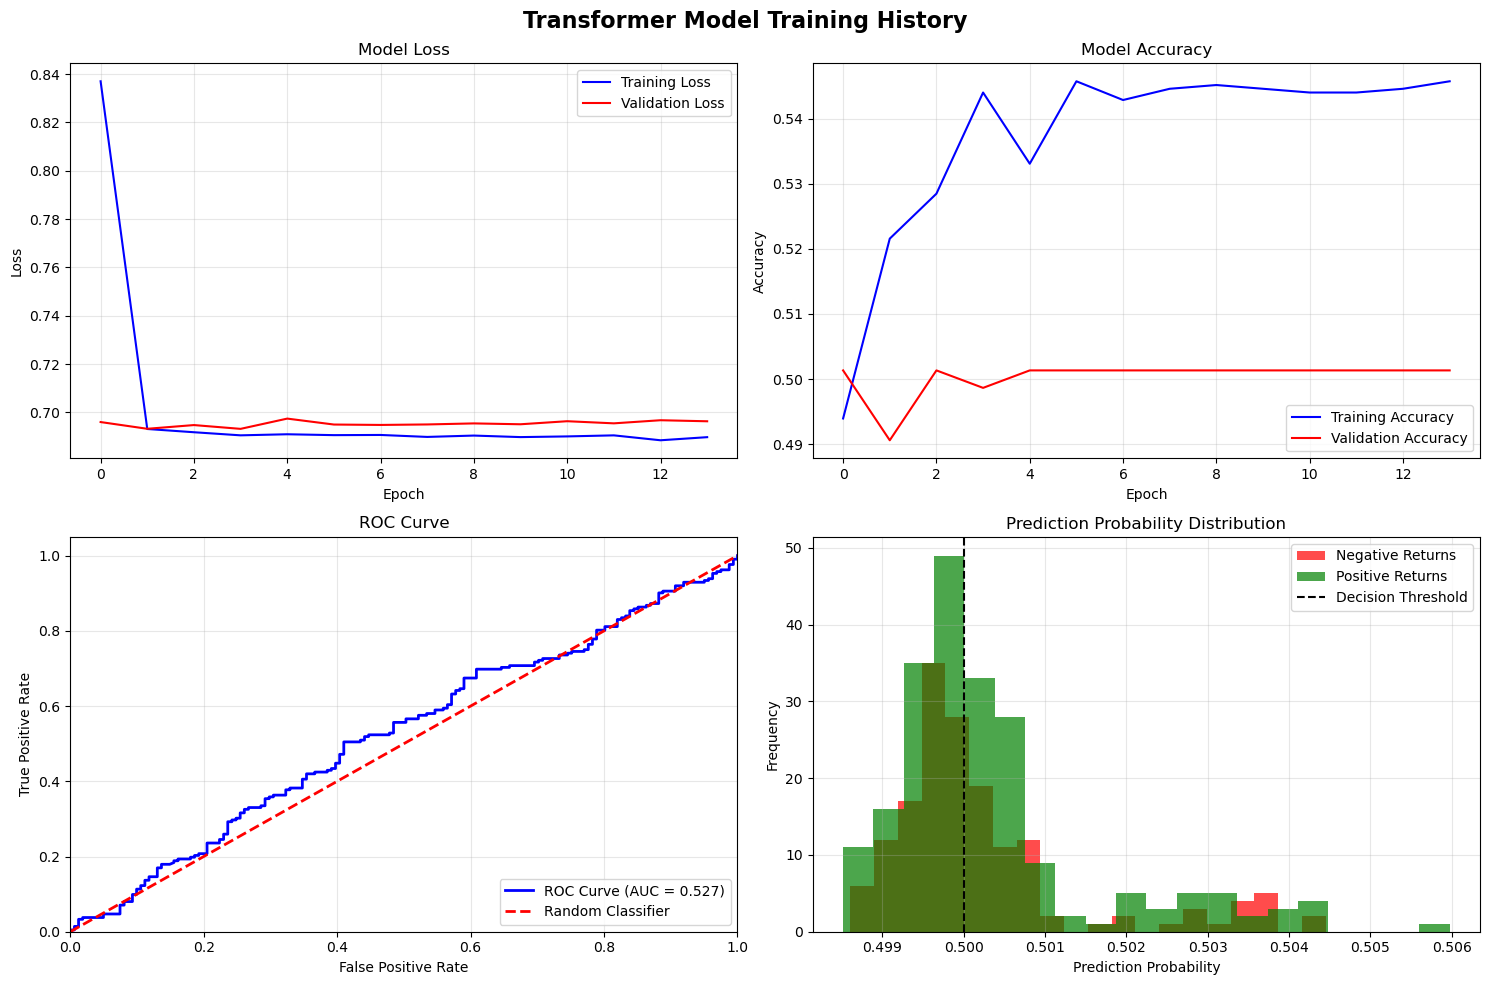


🔍 Training Insights:
  • Total epochs trained: 14
  • Best validation loss at epoch: 4
  • Best validation accuracy at epoch: 1
  • Early stopping triggered (saved 36 epochs)

🎯 Model Performance Analysis:
  • Positive trade success rate: 60.7%
  • Negative trade avoidance rate: 46.3%

🏆 FINAL MODEL SUMMARY:
✅ Successfully trained a Transformer model for financial prediction
📊 Model Architecture:
  • 2 Transformer blocks with 8 attention heads
  • 64-dimensional embeddings
  • 14 epochs of training

📈 Performance Metrics:
  • Test Accuracy: 52.8%
  • AUC-ROC: 0.527
  • Precision: 60.7%
  • Recall: 48.1%

💡 Next Steps:
  • Consider feature engineering improvements
  • Experiment with different model architectures
  • Implement risk management strategies
  • Backtest the model on different time periods
  • Deploy for live trading (with appropriate risk controls)

🎉 TRANSFORMER TRADING BOT IMPLEMENTATION COMPLETE!


In [24]:
# --- Training Visualization and Final Analysis ---
print("\n📈 TRAINING VISUALIZATION AND FINAL ANALYSIS")
print("=" * 60)

# Plot training history
print("📊 Creating training history visualization...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Transformer Model Training History', fontsize=16, fontweight='bold')

# Plot 1: Training and Validation Loss
axes[0, 0].plot(history.history['loss'], label='Training Loss', color='blue')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', color='red')
axes[0, 0].set_title('Model Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Training and Validation Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axes[0, 1].set_title('Model Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_prob)
axes[1, 0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {test_auc:.3f})')
axes[1, 0].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
axes[1, 0].set_xlim([0.0, 1.0])
axes[1, 0].set_ylim([0.0, 1.05])
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curve')
axes[1, 0].legend(loc="lower right")
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Prediction Probability Distribution
axes[1, 1].hist(test_predictions_prob[y_test == 0], bins=20, alpha=0.7, label='Negative Returns', color='red')
axes[1, 1].hist(test_predictions_prob[y_test == 1], bins=20, alpha=0.7, label='Positive Returns', color='green')
axes[1, 1].axvline(x=0.5, color='black', linestyle='--', label='Decision Threshold')
axes[1, 1].set_xlabel('Prediction Probability')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Prediction Probability Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Training insights
print(f"\n🔍 Training Insights:")
total_epochs = len(history.history['loss'])
best_val_loss_epoch = np.argmin(history.history['val_loss']) + 1
best_val_acc_epoch = np.argmax(history.history['val_accuracy']) + 1

print(f"  • Total epochs trained: {total_epochs}")
print(f"  • Best validation loss at epoch: {best_val_loss_epoch}")
print(f"  • Best validation accuracy at epoch: {best_val_acc_epoch}")

# Check if early stopping was triggered
if total_epochs < EPOCHS:
    print(f"  • Early stopping triggered (saved {EPOCHS - total_epochs} epochs)")
else:
    print(f"  • Training completed full {EPOCHS} epochs")

# Model performance analysis
print(f"\n🎯 Model Performance Analysis:")

# Trading strategy simulation (simplified)
# Assume we trade based on model predictions
correct_positive_trades = true_positives
total_positive_trades = true_positives + false_positives
correct_negative_trades = true_negatives
total_negative_trades = true_negatives + false_negatives

if total_positive_trades > 0:
    positive_trade_success_rate = correct_positive_trades / total_positive_trades
    print(f"  • Positive trade success rate: {positive_trade_success_rate:.1%}")
else:
    print(f"  • No positive trades predicted")

if total_negative_trades > 0:
    negative_trade_success_rate = correct_negative_trades / total_negative_trades
    print(f"  • Negative trade avoidance rate: {negative_trade_success_rate:.1%}")

# Risk assessment
high_confidence_accuracy = None
if high_conf_positive + high_conf_negative > 0:
    # Check accuracy of high confidence predictions
    high_conf_mask = (test_predictions_prob > 0.7) | (test_predictions_prob < 0.3)
    high_conf_predictions = test_predictions_binary[high_conf_mask]
    high_conf_actual = y_test[high_conf_mask]
    high_confidence_accuracy = np.mean(high_conf_predictions == high_conf_actual)
    print(f"  • High confidence prediction accuracy: {high_confidence_accuracy:.1%}")

print(f"\n🏆 FINAL MODEL SUMMARY:")
print(f"=" * 60)
print(f"✅ Successfully trained a Transformer model for financial prediction")
print(f"📊 Model Architecture:")
print(f"  • {NUM_LAYERS} Transformer blocks with {NUM_HEADS} attention heads")
print(f"  • {D_MODEL}-dimensional embeddings")
print(f"  • {total_epochs} epochs of training")
print(f"\n📈 Performance Metrics:")
print(f"  • Test Accuracy: {test_accuracy:.1%}")
print(f"  • AUC-ROC: {test_auc:.3f}")
print(f"  • Precision: {precision:.1%}")
print(f"  • Recall: {recall:.1%}")
if high_confidence_accuracy:
    print(f"  • High Confidence Accuracy: {high_confidence_accuracy:.1%}")

print(f"\n💡 Next Steps:")
print(f"  • Consider feature engineering improvements")
print(f"  • Experiment with different model architectures")
print(f"  • Implement risk management strategies")
print(f"  • Backtest the model on different time periods")
print(f"  • Deploy for live trading (with appropriate risk controls)")

print(f"\n🎉 TRANSFORMER TRADING BOT IMPLEMENTATION COMPLETE!")